# 1. Importing the necessary libraries

In [1]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
import missingno as msno
from wordcloud import WordCloud
from PIL import Image

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

# NLP 
from collections import Counter
import requests
import re
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem import WordNetLemmatizer
import gensim
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize

# Other imports
import numpy as np 
import pandas as pd 


# Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Functions
import sys
sys.path.insert(0, '/Users/patri/Documents/AllWomen/Module_0/_functions_')
from fx_NLP import *
from Functions_EDA import *

[nltk_data] Downloading package stopwords to /Users/patri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/patri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/patri/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 2. Loading the dataset and understanding it

In [2]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
data

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


# 3. Data Cleaning and EDA

In [5]:
percentage_nullValues(data)

Percentage_NaN
Title                              16.2
Review Text                         3.6
Division Name                       0.1
Department Name                     0.1
Class Name                          0.1
Unnamed: 0                          0.0
Clothing ID                         0.0
Age                                 0.0
Rating                              0.0
Recommended IND                     0.0
Positive Feedback Count             0.0

In [6]:
rawdata = data.copy()

In [7]:
data = data.drop(['Title', 'Clothing ID'], axis= 1)

In [8]:
data = data.drop(["Unnamed: 0"], axis= 1)

In [9]:
data

Age                                        Review Text  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 8 columns]

In [10]:
data.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [13]:
data.shape

(22628, 8)

In [14]:
data.rename(columns={"Review Text":"Review", "Recommended IND":"Recommended", "Division Name": "Division", "Department Name": "Department", "Class Name": "Class"}, inplace = True)

In [15]:
data.columns

Index(['Age', 'Review', 'Rating', 'Recommended', 'Positive Feedback Count',
       'Division', 'Department', 'Class'],
      dtype='object')

In [16]:
data

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Initmates   Intimate   
1                1                        4         General    Dresses   
2                0                        0         General    Dresses   
3                1                        0  General Petite    Bottoms   
4                1                        6         General       Tops   
...            ...                      ...             ...        ...   
23481            1                        0  General Petite    Dresses   
23482            1                        0  General Petite       Tops   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   
23485            1                       22  General Petite    Dresses   

           Class  
0      Intimates  
1        Dresses  
2        Dresses  
3          Pants  
4        Blouses  
...          ...  
23481    Dresses  
23482      Knits  
23483    Dresses  
23484    Dresses  
23485    Dresses  

[22628 rows x 8 columns]

## a. UNIVARIATE ANALYSIS

## Understanding AGE

In [17]:
data.columns

Index(['Age', 'Review', 'Rating', 'Recommended', 'Positive Feedback Count',
       'Division', 'Department', 'Class'],
      dtype='object')

In [18]:
data.Age.unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 64, 42, 35, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [19]:
data.Age.nunique()

77

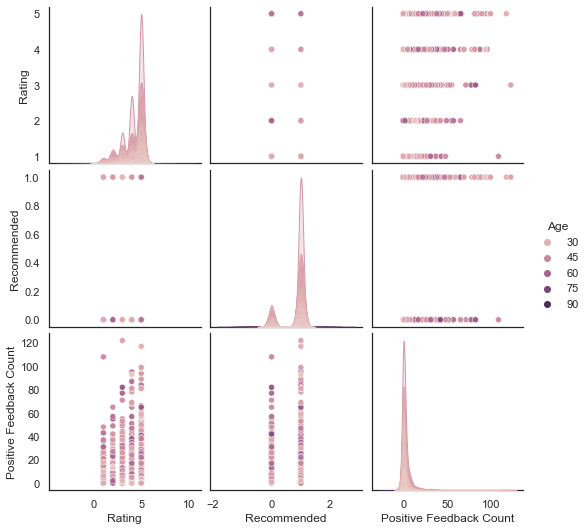

In [20]:
sns.pairplot(data, hue='Age')

In [21]:
data.Age.value_counts()

39    1225
35     851
36     799
34     765
38     751
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64

In [22]:
data.Age.value_counts(normalize=True)*100

39    5.413647
35    3.760827
36    3.531024
34    3.380767
38    3.318897
        ...   
93    0.008839
90    0.008839
86    0.008839
99    0.008839
92    0.004419
Name: Age, Length: 77, dtype: float64

In [23]:
data.Age.describe()

count    22628.000000
mean        43.282880
std         12.328176
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [24]:
data[data.Age == 93]["Review"].values

array(["This is by far the cutest, most glamorous one piece i have ever tried on! it fits perfectly and is flattering in the right places, it doesn't show too much cleavage and is modest enough for family events. absolutely love this suit in navy. wasn't in love with the rest of the patterns, hoping they come out in more solid colors someday soon!",
       'Great quality. very versatile design and super cute. runs small - i ordered up a size which was perfect.'],
      dtype=object)

In [25]:
data[data.Age == 85]

Age                                             Review  Rating  \
1188    85  Perfect for the summer weddings that i am atte...       5   
1616    85  Unique print but not great execution. the pant...       2   
5909    85  Wish someone warned of the navy one being not ...       3   
7292    85  Deletta has done it again, designed a top that...       4   
16323   85  What more could you want than a dress that sli...       5   
16780   85  This top is quite boxy and i was very disappoi...       1   

       Recommended  Positive Feedback Count        Division Department  \
1188             1                        4  General Petite    Bottoms   
1616             1                        2         General    Bottoms   
5909             1                        0         General       Tops   
7292             1                        1         General       Tops   
16323            1                        0  General Petite    Dresses   
16780            0                        0  General Petite       Tops   

         Class  
1188     Pants  
1616     Pants  
5909   Blouses  
7292     Knits  
16323  Dresses  
16780  Blouses

In [26]:
data[data.Age >= 60].shape  #only 14 reviews are from people that are older than 85 y/o

(2719, 8)

In [27]:
data[data.Age < 60].shape

(19909, 8)

In [28]:
data[data.Age >= 45].shape

(9375, 8)

In [29]:
data[data.Age < 45].shape

(13253, 8)

In [30]:
data.loc[data['Age'] == 39]

Age                                             Review  Rating  \
6       39  I aded this in my basket at hte last mintue to...       5   
7       39  I ordered this in carbon for store pick up, an...       4   
11      39  This dress is perfection! so pretty and flatte...       5   
34      39  This is such a neat dress. the color is great ...       5   
52      39  Love the color and style, but material snags e...       3   
...    ...                                                ...     ...   
23448   39  I like the contrast of the skirt with the bodi...       5   
23449   39  I tried these on because the color is really p...       3   
23453   39  I am 5' 2" about 118 lbs. thought this fit rea...       4   
23454   39  The fabric is very thick and textured almost l...       4   
23477   39  I'm so impressed with the beautiful color comb...       4   

       Recommended  Positive Feedback Count        Division Department  \
6                1                        1  General Petite       Tops   
7                1                        4  General Petite       Tops   
11               1                        2  General Petite    Dresses   
34               1                        0       Initmates   Intimate   
52               1                        3         General    Dresses   
...            ...                      ...             ...        ...   
23448            1                        7  General Petite    Dresses   
23449            0                        7  General Petite   Intimate   
23453            1                        0  General Petite    Dresses   
23454            1                        1         General    Bottoms   
23477            1                        5  General Petite    Dresses   

         Class  
6        Knits  
7        Knits  
11     Dresses  
34      Lounge  
52     Dresses  
...        ...  
23448  Dresses  
23449   Lounge  
23453  Dresses  
23454   Skirts  
23477  Dresses  

[1225 rows x 8 columns]

In [31]:
age = data.Age.value_counts().reset_index()

In [32]:
age

index   Age
0      39  1225
1      35   851
2      36   799
3      34   765
4      38   751
..    ...   ...
72     93     2
73     90     2
74     86     2
75     99     2
76     92     1

[77 rows x 2 columns]

In [33]:
age.columns = ["Age", "Count"]

In [34]:
age

Age  Count
0    39   1225
1    35    851
2    36    799
3    34    765
4    38    751
..  ...    ...
72   93      2
73   90      2
74   86      2
75   99      2
76   92      1

[77 rows x 2 columns]

In [35]:
fig = px.bar(age, x = 'Age', y = 'Count', color= 'Age', color_discrete_sequence="brwnyl")
fig.show() # Use this one and look for other colors

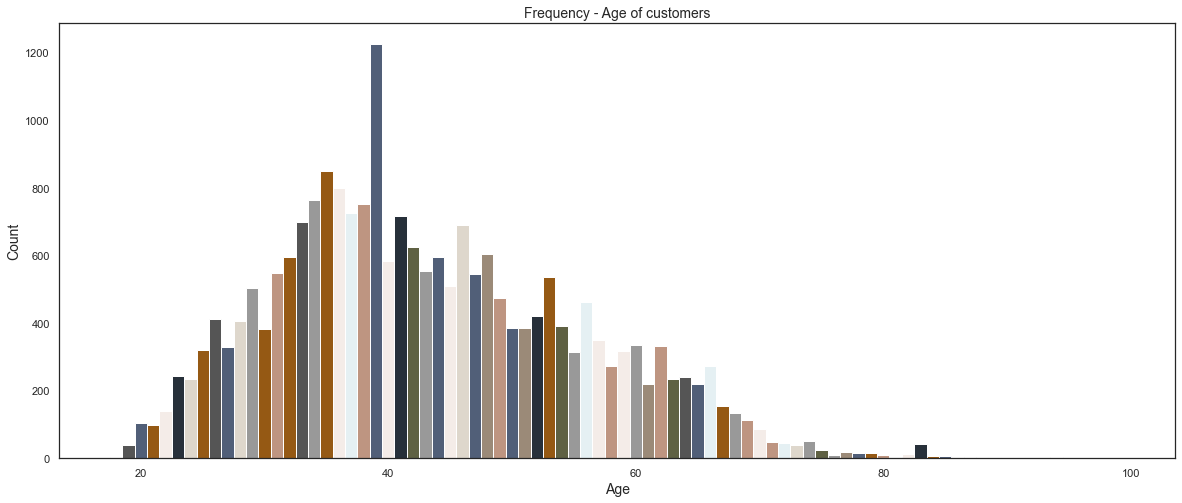

In [199]:
import matplotlib.pyplot as plt
import pandas as pd
   

colors = ['#515f78','#955914', "#f4ece8", "#999999",'#be9581','#e5f0f3','#27303a', '#555555', "#ded7cc", "#5f6143", "#9b8a78", '#515f78','#955914', "#f4ece8", "#999999",'#be9581']
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(age["Age"], age["Count"], width=1, color=colors)
plt.title('Frequency - Age of customers', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(False)
plt.show()

In [36]:
fig = px.box(data, y='Age', points= "suspectedoutliers", color_discrete_sequence=['#955914'])
fig.show()

In [37]:
# Three ranges 0 = 18-35, 1 = 35-50, 2 = >50

In [38]:
young = data.loc[(data['Age'] >= 18) & (data['Age'] <= 35)]


In [39]:
young

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
8       24  I love this dress. i usually get an xs but it ...       5   
9       34  I'm 5"5' and 125 lbs. i ordered the s petite t...       5   
16      34  Material and color is nice.  the leg opening i...       3   
...    ...                                                ...     ...   
23476   27  These bottoms are very cute but defiantly chee...       4   
23478   32  I was surprised at the positive reviews for th...       1   
23481   34  I was very happy to snag this dress at such a ...       5   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Initmates   Intimate   
1                1                        4         General    Dresses   
8                1                        0         General    Dresses   
9                1                        0         General    Dresses   
16               1                        2         General    Bottoms   
...            ...                      ...             ...        ...   
23476            1                        0       Initmates   Intimate   
23478            0                        0  General Petite    Dresses   
23481            1                        0  General Petite    Dresses   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   

           Class  
0      Intimates  
1        Dresses  
8        Dresses  
9        Dresses  
16         Pants  
...          ...  
23476       Swim  
23478    Dresses  
23481    Dresses  
23483    Dresses  
23484    Dresses  

[6676 rows x 8 columns]

In [40]:
adult = data.loc[(data['Age'] > 35) & (data['Age'] <= 50)]

In [41]:
adult

Age                                             Review  Rating  \
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
5       49  I love tracy reese dresses, but this one is no...       2   
6       39  I aded this in my basket at hte last mintue to...       5   
7       39  I ordered this in carbon for store pick up, an...       4   
...    ...                                                ...     ...   
23469   50  My size was not available so based on reviews ...       4   
23475   41  Cute dress but not for me.  the waist is too h...       3   
23477   39  I'm so impressed with the beautiful color comb...       4   
23479   42  So i wasn't sure about ordering this skirt bec...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   

       Recommended  Positive Feedback Count        Division Department  \
3                1                        0  General Petite    Bottoms   
4                1                        6         General       Tops   
5                0                        4         General    Dresses   
6                1                        1  General Petite       Tops   
7                1                        4  General Petite       Tops   
...            ...                      ...             ...        ...   
23469            1                        0  General Petite   Intimate   
23475            1                        0  General Petite    Dresses   
23477            1                        5  General Petite    Dresses   
23479            1                        0  General Petite    Bottoms   
23482            1                        0  General Petite       Tops   

         Class  
3        Pants  
4      Blouses  
5      Dresses  
6        Knits  
7        Knits  
...        ...  
23469   Lounge  
23475  Dresses  
23477  Dresses  
23479   Skirts  
23482    Knits  

[9785 rows x 8 columns]

In [42]:
senior = data.loc[(data['Age'] > 50) & (data['Age'] < 99)]

In [43]:
senior

Age                                             Review  Rating  \
2       60  I had such high hopes for this dress and reall...       3   
10      53  Dress runs small esp where the zipper area run...       3   
12      53  More and more i find myself reliant on the rev...       5   
21      55  I'm upset because for the price of the dress, ...       4   
24      55  I love this shirt because when i first saw it,...       5   
...    ...                                                ...     ...   
23458   63  This is my new favorite sweater. it is lightwe...       5   
23459   57  This is my new favorite dress! my only complai...       4   
23463   65  These pants overall are very comfortable, but ...       4   
23467   60  I worry when i have an elastic waist, or somet...       5   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended  Positive Feedback Count        Division Department  \
2                0                        0         General    Dresses   
10               0                       14         General    Dresses   
12               1                        2  General Petite    Dresses   
21               1                       14         General    Dresses   
24               1                        0         General       Tops   
...            ...                      ...             ...        ...   
23458            1                        0  General Petite       Tops   
23459            1                        3  General Petite    Dresses   
23463            1                        1  General Petite   Intimate   
23467            1                       23  General Petite    Dresses   
23485            1                       22  General Petite    Dresses   

         Class  
2      Dresses  
10     Dresses  
12     Dresses  
21     Dresses  
24     Blouses  
...        ...  
23458    Knits  
23459  Dresses  
23463   Lounge  
23467  Dresses  
23485  Dresses  

[6165 rows x 8 columns]

## Understanding RATING

In [44]:
data.columns

Index(['Age', 'Review', 'Rating', 'Recommended', 'Positive Feedback Count',
       'Division', 'Department', 'Class'],
      dtype='object')

In [45]:
data.Rating.unique() #rates from 1 to 5

array([4, 5, 3, 2, 1])

In [46]:
data.Rating.value_counts(normalize=True)*100

5    55.360615
4    21.689942
3    12.475694
2     6.845501
1     3.628248
Name: Rating, dtype: float64

In [47]:
ratings = data.Rating.value_counts().reset_index()

In [48]:
ratings

index  Rating
0      5   12527
1      4    4908
2      3    2823
3      2    1549
4      1     821

In [49]:
ratings.columns = ["Rating", "Count"]

In [50]:
fig = px.bar(ratings, x = 'Rating', y = 'Count', color= 'Rating', color_discrete_sequence=["Brown","BurlyWood", "DarkRed", "DarkMagenta", "DarkRed", "DarkSalmon", "GoldenRod"])
fig.show()

In [51]:
highest_ratings = data[data.Rating >= 4]

In [52]:
highest_ratings.shape

(17435, 8)

In [53]:
data[data.Rating < 4]

Age                                             Review  Rating  \
2       60  I had such high hopes for this dress and reall...       3   
5       49  I love tracy reese dresses, but this one is no...       2   
10      53  Dress runs small esp where the zipper area run...       3   
14      50  This is a nice choice for holiday gatherings. ...       3   
16      34  Material and color is nice.  the leg opening i...       3   
...    ...                                                ...     ...   
23475   41  Cute dress but not for me.  the waist is too h...       3   
23478   32  I was surprised at the positive reviews for th...       1   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   

       Recommended  Positive Feedback Count        Division Department  \
2                0                        0         General    Dresses   
5                0                        4         General    Dresses   
10               0                       14         General    Dresses   
14               1                        1         General    Dresses   
16               1                        2         General    Bottoms   
...            ...                      ...             ...        ...   
23475            1                        0  General Petite    Dresses   
23478            0                        0  General Petite    Dresses   
23482            1                        0  General Petite       Tops   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   

         Class  
2      Dresses  
5      Dresses  
10     Dresses  
14     Dresses  
16       Pants  
...        ...  
23475  Dresses  
23478  Dresses  
23482    Knits  
23483  Dresses  
23484  Dresses  

[5193 rows x 8 columns]

In [54]:
lowest_ratings = data[data.Rating < 4]

In [55]:
lowest_ratings.shape

(5193, 8)

In [56]:
highest_ratings.Age.mean()

43.50387152279897

In [57]:
highest_ratings.Age.mode()

0    39
Name: Age, dtype: int64

In [58]:
lowest_ratings.Age.mean()

42.54092046986328

In [59]:
lowest_ratings.Age.mode()

0    39
Name: Age, dtype: int64

In [60]:
highest_ratings.Class.value_counts()

Dresses           4634
Knits             3523
Blouses           2256
Pants             1074
Sweaters          1036
Jeans              909
Fine gauge         837
Skirts             714
Jackets            550
Lounge             545
Outerwear          254
Swim               252
Shorts             240
Sleep              175
Legwear            126
Intimates          117
Layering           113
Trend               78
Casual bottoms       1
Chemises             1
Name: Class, dtype: int64

In [61]:
lowest_ratings.Class.value_counts()

Dresses       1511
Knits         1103
Blouses        727
Sweaters       344
Pants          276
Fine gauge     222
Jeans          195
Skirts         189
Jackets        133
Lounge         124
Swim            80
Outerwear       65
Shorts          64
Trend           40
Sleep           39
Legwear         32
Intimates       30
Layering        19
Name: Class, dtype: int64

In [62]:
young.Rating.value_counts(normalize=True)*100

5    54.134212
4    21.165368
3    13.630917
2     7.444578
1     3.624925
Name: Rating, dtype: float64

In [63]:
ratings_young = young.Rating.value_counts().reset_index()

In [64]:
ratings_young

index  Rating
0      5    3614
1      4    1413
2      3     910
3      2     497
4      1     242

In [65]:
ratings_young.columns = ["Rating", "Count"]

In [66]:
fig = px.pie(ratings_young, values='Count', names='Rating', title='Frequency of ratings in younger group', color_discrete_sequence=['#515f78','#955914','#be9581','#e5f0f3','#27303a'])
fig.show()

In [67]:
adult.Rating.value_counts(normalize=True)*100

5    53.755749
4    22.800204
3    12.866633
2     7.031170
1     3.546244
Name: Rating, dtype: float64

In [68]:
ratings_adult = adult.Rating.value_counts().reset_index()

In [69]:
ratings_adult

index  Rating
0      5    5260
1      4    2231
2      3    1259
3      2     688
4      1     347

In [70]:
ratings_adult.columns = ["Rating", "Count"]

In [71]:
fig = px.pie(ratings_adult, values='Count', names='Rating', title='Frequency of ratings in adult group', color_discrete_sequence=['#515f78','#955914','#be9581','#e5f0f3','#27303a'])
fig.show()

In [72]:
senior.Rating.value_counts(normalize=True)*100

5    59.237632
4    20.486618
3    10.608273
2     5.904298
1     3.763179
Name: Rating, dtype: float64

In [73]:
ratings_senior = senior.Rating.value_counts().reset_index()

In [74]:
ratings_senior.columns = ["Rating", "Count"]

In [75]:
fig = px.pie(ratings_senior, values='Count', names='Rating', title='Frequency of ratings in senior group', color_discrete_sequence=['#515f78','#955914','#be9581','#e5f0f3','#27303a'])
fig.show()

In [76]:
# Divide the dataset in highest ratings and lowest ratings for topic modeling

## Understanding DIVISION

In [77]:
data.Division.unique()

array(['Initmates', 'General', 'General Petite'], dtype=object)

In [78]:
data.Division.value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Division, dtype: int64

In [79]:
replace_map = {'Initmates': "Intimates"}
data['Division'].replace(replace_map, inplace=True)

In [80]:
data.Division.unique()

array(['Intimates', 'General', 'General Petite'], dtype=object)

In [81]:
division = data['Division'].value_counts().reset_index()

In [82]:
division

index  Division
0         General     13365
1  General Petite      7837
2       Intimates      1426

In [83]:
division.columns = ["Division", "Count"]

In [84]:
fig = px.pie(division, values='Count', names='Division', title='Frequency of Division', color_discrete_sequence=['#515f78','#955914','#be9581','#999999','#27303a'])
fig.show()

In [85]:
fig = px.bar(division, x = 'Division', y = 'Count', color= 'Division', color_discrete_sequence=['#515f78','#955914','#be9581','#999999','#27303a'])
fig.show()

In [86]:
young.Division.value_counts(normalize=True)*100 # younger people look for intimates more in comparison to adults and seniors

General           58.088676
General Petite    33.732774
Initmates          8.178550
Name: Division, dtype: float64

In [87]:
adult.Division.value_counts(normalize=True)*100

General           59.284619
General Petite    35.002555
Initmates          5.712826
Name: Division, dtype: float64

In [88]:
senior.Division.value_counts(normalize=True)*100

General           59.756691
General Petite    35.036496
Initmates          5.206813
Name: Division, dtype: float64

## Understanding Department

In [116]:
data.Department.value_counts(normalize=True)*100

Tops        44.405162
Dresses     27.156620
Bottoms     16.183489
Intimate     7.305109
Jackets      4.428142
Trend        0.521478
Name: Department, dtype: float64

In [117]:
department = data.Department.value_counts().reset_index()

In [118]:
department

index  Department
0      Tops       10048
1   Dresses        6145
2   Bottoms        3662
3  Intimate        1653
4   Jackets        1002
5     Trend         118

In [119]:
department.columns = ["Department", "Count"]

In [120]:
fig = px.bar(department, x = 'Department', y = 'Count', color= 'Department', color_discrete_sequence=['#515f78','#955914','#be9581','#999999','#27303a'])
fig.show()

In [121]:
tops = data[data["Department"] == "Tops"]

In [122]:
tops

Age                                             Review  Rating  \
4       47  This shirt is very flattering to all due to th...       5   
6       39  I aded this in my basket at hte last mintue to...       5   
7       39  I ordered this in carbon for store pick up, an...       4   
17      41  Took a chance on this blouse and so glad i did...       5   
20      33  If this product was in petite, i would get the...       4   
...    ...                                                ...     ...   
23445   53  I love this jacket so much, i bought two. it g...       4   
23446   36  This tee is amazing. it's light weight and per...       5   
23458   63  This is my new favorite sweater. it is lightwe...       5   
23472   32  I saw the shirt on the retailer website and ne...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   

       Recommended  Positive Feedback Count        Division Department  \
4                1                        6         General       Tops   
6                1                        1  General Petite       Tops   
7                1                        4  General Petite       Tops   
17               1                        0         General       Tops   
20               1                        2         General       Tops   
...            ...                      ...             ...        ...   
23445            1                        0  General Petite       Tops   
23446            1                        3         General       Tops   
23458            1                        0  General Petite       Tops   
23472            1                        0         General       Tops   
23482            1                        0  General Petite       Tops   

         Class  
4      Blouses  
6        Knits  
7        Knits  
17     Blouses  
20     Blouses  
...        ...  
23445    Knits  
23446    Knits  
23458    Knits  
23472    Knits  
23482    Knits  

[10048 rows x 8 columns]

In [123]:
type_tops = tops.Class.value_counts().reset_index()

In [124]:
type_tops

index  Class
0       Knits   4626
1     Blouses   2983
2    Sweaters   1380
3  Fine gauge   1059

In [125]:
type_tops.columns = ["Type", "Count"]

In [126]:
fig = px.pie(type_tops, values='Count', names='Type', title='Types of Tops', color_discrete_sequence=['#515f78','#955914','#be9581','#e5f0f3','#27303a'])
fig.show()

## Understanding CLASS

In [89]:
data["Class"].nunique()

20

In [90]:
data["Class"].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [91]:
data["Class"].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class, dtype: int64

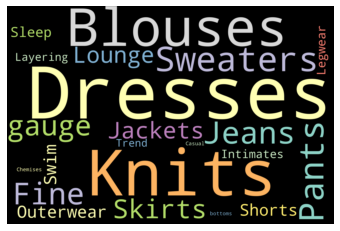

In [92]:
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set3', collocations=False,).generate(" ".join(data["Class"]))
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:
# Group by age and see: What is the most purchased product per age group?

In [94]:
young.Class.value_counts(normalize=True)*100

Dresses           30.332534
Knits             19.847214
Blouses           11.863391
Sweaters           5.062912
Pants              5.002996
Skirts             4.388856
Jeans              4.119233
Fine gauge         3.729778
Lounge             3.100659
Jackets            3.055722
Swim               2.366687
Shorts             1.647693
Outerwear          1.378071
Intimates          1.033553
Sleep              0.943679
Legwear            0.913721
Layering           0.778910
Trend              0.419413
Casual bottoms     0.014979
Name: Class, dtype: float64

In [95]:
young_class = young.Class.value_counts().reset_index()

In [96]:
young_class

index  Class
0          Dresses   2025
1            Knits   1325
2          Blouses    792
3         Sweaters    338
4            Pants    334
5           Skirts    293
6            Jeans    275
7       Fine gauge    249
8           Lounge    207
9          Jackets    204
10            Swim    158
11          Shorts    110
12       Outerwear     92
13       Intimates     69
14           Sleep     63
15         Legwear     61
16        Layering     52
17           Trend     28
18  Casual bottoms      1

In [97]:
young_class.columns = ["Class", "Count"]

In [98]:
fig = px.bar(young_class, x = 'Class', y = 'Count', color= 'Class', color_discrete_sequence=['#515f78','#955914', "#f4ece8", "#999999",'#be9581','#e5f0f3','#27303a', '#555555', "#ded7cc", "#5f6143", "#9b8a78", '#515f78','#955914', "#f4ece8", "#999999",'#be9581'])
fig.show()

In [99]:
fig = px.pie(young_class, values='Count', names='Class', title='Frequency of Class in younger group', color_discrete_sequence=['#515f78','#955914', "#f4ece8", "#999999",'#be9581','#e5f0f3','#27303a', '#555555', "#ded7cc", "#5f6143", "#9b8a78", '#515f78','#955914', "#f4ece8", "#999999",'#be9581'])
fig.show()

In [100]:
adult.Class.value_counts(normalize=True)*100

Dresses       27.102708
Knits         20.091978
Blouses       13.030148
Pants          6.428206
Sweaters       6.152274
Jeans          5.549310
Fine gauge     4.977006
Skirts         3.914154
Lounge         2.922841
Jackets        2.749106
Shorts         1.369443
Swim           1.369443
Outerwear      1.236587
Sleep          0.929995
Legwear        0.602964
Trend          0.551865
Intimates      0.531426
Layering       0.480327
Chemises       0.010220
Name: Class, dtype: float64

In [101]:
adult_class = adult.Class.value_counts().reset_index()

In [102]:
adult_class.columns = ["Class", "Count"]

In [103]:
fig = px.bar(adult_class, x = 'Class', y = 'Count', color= 'Class', color_discrete_sequence=['#515f78','#955914','#be9581','#999999','#27303a'])
fig.show()

In [104]:
fig = px.pie(adult_class, values='Count', names='Class', title='Frequency of Class in adult group', color_discrete_sequence=['#515f78','#955914', "#f4ece8", "#999999",'#be9581','#e5f0f3','#27303a', '#555555', "#ded7cc", "#5f6143", "#9b8a78", '#515f78','#955914', "#f4ece8", "#999999",'#be9581'])
fig.show()

In [105]:
senior.Class.value_counts(normalize=True)*100

Dresses       23.795620
Knits         21.654501
Blouses       14.858070
Sweaters       7.120843
Pants          6.277372
Fine gauge     5.239254
Jeans          4.639092
Skirts         3.682076
Jackets        3.406326
Lounge         2.854826
Outerwear      1.719384
Sleep          0.973236
Shorts         0.973236
Swim           0.648824
Legwear        0.616383
Trend          0.583942
Layering       0.535280
Intimates      0.421736
Name: Class, dtype: float64

In [106]:
senior_class = senior.Class.value_counts().reset_index()

In [107]:
senior_class.columns = ["Class", "Count"]

In [108]:
fig = px.pie(senior_class, values='Count', names='Class', title='Frequency of Class in senior group', color_discrete_sequence=['#515f78','#955914', "#f4ece8", "#999999",'#be9581','#e5f0f3','#27303a', '#555555', "#ded7cc", "#5f6143", "#9b8a78", '#515f78','#955914', "#f4ece8", "#999999",'#be9581'])
fig.show()

In [109]:
'#515f78','#955914','#be9581','#e5f0f3','#27303a'

('#515f78', '#955914', '#be9581', '#e5f0f3', '#27303a')

## Understanding Recommendations

In [110]:
data

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Intimates   Intimate   
1                1                        4         General    Dresses   
2                0                        0         General    Dresses   
3                1                        0  General Petite    Bottoms   
4                1                        6         General       Tops   
...            ...                      ...             ...        ...   
23481            1                        0  General Petite    Dresses   
23482            1                        0  General Petite       Tops   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   
23485            1                       22  General Petite    Dresses   

           Class  
0      Intimates  
1        Dresses  
2        Dresses  
3          Pants  
4        Blouses  
...          ...  
23481    Dresses  
23482      Knits  
23483    Dresses  
23484    Dresses  
23485    Dresses  

[22628 rows x 8 columns]

In [111]:
data.Recommended.value_counts(normalize=True)*100

1    81.876436
0    18.123564
Name: Recommended, dtype: float64

In [112]:
recommended =  data.Recommended.value_counts().reset_index()

In [113]:
recommended

index  Recommended
0      1        18527
1      0         4101

In [114]:
recommended.columns = ["Recommended", "Count"]

In [115]:
fig = px.bar(recommended, x = 'Recommended', y = 'Count', color= 'Recommended', color_discrete_sequence=['#515f78','#955914','#be9581','#999999','#27303a'])
fig.show()

## b. NLP PREPROCESSING

In [127]:
data

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Intimates   Intimate   
1                1                        4         General    Dresses   
2                0                        0         General    Dresses   
3                1                        0  General Petite    Bottoms   
4                1                        6         General       Tops   
...            ...                      ...             ...        ...   
23481            1                        0  General Petite    Dresses   
23482            1                        0  General Petite       Tops   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   
23485            1                       22  General Petite    Dresses   

           Class  
0      Intimates  
1        Dresses  
2        Dresses  
3          Pants  
4        Blouses  
...          ...  
23481    Dresses  
23482      Knits  
23483    Dresses  
23484    Dresses  
23485    Dresses  

[22628 rows x 8 columns]

In [128]:
data['clean_reviews'] = data['Review'].apply(lambda x : text_preprocessing(x, "english"))

In [129]:
data

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Intimates   Intimate   
1                1                        4         General    Dresses   
2                0                        0         General    Dresses   
3                1                        0  General Petite    Bottoms   
4                1                        6         General       Tops   
...            ...                      ...             ...        ...   
23481            1                        0  General Petite    Dresses   
23482            1                        0  General Petite       Tops   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   
23485            1                       22  General Petite    Dresses   

           Class                                      clean_reviews  
0      Intimates        absolutely wonderful silky sexy comfortable  
1        Dresses  love dress sooo pretty happened find store im ...  
2        Dresses  high hopes dress really wanted work initially ...  
3          Pants  love love love jumpsuit fun flirty fabulous ev...  
4        Blouses  shirt flattering due adjustable front tie perf...  
...          ...                                                ...  
23481    Dresses  happy snag dress great price easy slip flatter...  
23482      Knits  reminds maternity clothes soft stretchy shiny ...  
23483    Dresses  fit well top see never would worked im glad ab...  
23484    Dresses  bought dress wedding summer cute unfortunately...  
23485    Dresses  dress lovely platinum feminine fits perfectly ...  

[22628 rows x 9 columns]

In [130]:
all_words_clean = data['clean_reviews'].str.split(expand=True).unstack().value_counts()

In [131]:
import plotly.express as px
px.bar(all_words_clean, x = all_words_clean.index[:50],
      y = all_words_clean.values[:50], 
      color = all_words_clean.values[:50],
      color_discrete_sequence= "bone", 
      title = 'Top 50 word frequencies in the reviews',
      labels=dict(x='Words', y='Frequency'))

In [132]:
list_words = ["clothe", "love", "like", "im", "would", "really", "ordered", "ive", "wear", "wore", "top", "dress", "one", "well", "dont", "bought", "looked", "bit", "looks", "much", "also", "worn", "didnt", "though", "got", "think", "even"]

In [133]:
data['clean_reviews1'] = data['Review'].apply(lambda x : text_preprocessing_updated(x, list_words))

In [134]:
data

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Intimates   Intimate   
1                1                        4         General    Dresses   
2                0                        0         General    Dresses   
3                1                        0  General Petite    Bottoms   
4                1                        6         General       Tops   
...            ...                      ...             ...        ...   
23481            1                        0  General Petite    Dresses   
23482            1                        0  General Petite       Tops   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   
23485            1                       22  General Petite    Dresses   

           Class                                      clean_reviews  \
0      Intimates        absolutely wonderful silky sexy comfortable   
1        Dresses  love dress sooo pretty happened find store im ...   
2        Dresses  high hopes dress really wanted work initially ...   
3          Pants  love love love jumpsuit fun flirty fabulous ev...   
4        Blouses  shirt flattering due adjustable front tie perf...   
...          ...                                                ...   
23481    Dresses  happy snag dress great price easy slip flatter...   
23482      Knits  reminds maternity clothes soft stretchy shiny ...   
23483    Dresses  fit well top see never would worked im glad ab...   
23484    Dresses  bought dress wedding summer cute unfortunately...   
23485    Dresses  dress lovely platinum feminine fits perfectly ...   

                                          clean_reviews1  
0            absolutely wonderful silky sexy comfortable  
1      sooo pretty happened find store glad bc never ...  
2      high hopes wanted work initially petite small ...  
3      jumpsuit fun flirty fabulous every time get no...  
4      shirt flattering due adjustable front tie perf...  
...                                                  ...  
23481  happy snag great price easy slip flattering cu...  
23482  reminds maternity clothes soft stretchy shiny ...  
23483  fit see never worked glad able try store order...  
23484  wedding summer cute unfortunately fit isnt per...  
23485  lovely platinum feminine fits perfectly easy c...  

[22628 rows x 10 columns]

In [135]:
data['reviews_tokens'] = data['clean_reviews1'].apply(lambda x: word_tokenize(x))

In [136]:
data

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Intimates   Intimate   
1                1                        4         General    Dresses   
2                0                        0         General    Dresses   
3                1                        0  General Petite    Bottoms   
4                1                        6         General       Tops   
...            ...                      ...             ...        ...   
23481            1                        0  General Petite    Dresses   
23482            1                        0  General Petite       Tops   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   
23485            1                       22  General Petite    Dresses   

           Class                                      clean_reviews  \
0      Intimates        absolutely wonderful silky sexy comfortable   
1        Dresses  love dress sooo pretty happened find store im ...   
2        Dresses  high hopes dress really wanted work initially ...   
3          Pants  love love love jumpsuit fun flirty fabulous ev...   
4        Blouses  shirt flattering due adjustable front tie perf...   
...          ...                                                ...   
23481    Dresses  happy snag dress great price easy slip flatter...   
23482      Knits  reminds maternity clothes soft stretchy shiny ...   
23483    Dresses  fit well top see never would worked im glad ab...   
23484    Dresses  bought dress wedding summer cute unfortunately...   
23485    Dresses  dress lovely platinum feminine fits perfectly ...   

                                          clean_reviews1  \
0            absolutely wonderful silky sexy comfortable   
1      sooo pretty happened find store glad bc never ...   
2      high hopes wanted work initially petite small ...   
3      jumpsuit fun flirty fabulous every time get no...   
4      shirt flattering due adjustable front tie perf...   
...                                                  ...   
23481  happy snag great price easy slip flattering cu...   
23482  reminds maternity clothes soft stretchy shiny ...   
23483  fit see never worked glad able try store order...   
23484  wedding summer cute unfortunately fit isnt per...   
23485  lovely platinum feminine fits perfectly easy c...   

                                          reviews_tokens  
0      [absolutely, wonderful, silky, sexy, comfortable]  
1      [sooo, pretty, happened, find, store, glad, bc...  
2      [high, hopes, wanted, work, initially, petite,...  
3      [jumpsuit, fun, flirty, fabulous, every, time,...  
4      [shirt, flattering, due, adjustable, front, ti...  
...                                                  ...  
23481  [happy, snag, great, price, easy, slip, flatte...  
23482  [reminds, maternity, clothes, soft, stretchy, ...  
23483  [fit, see, never, worked, glad, able, try, sto...  
23484  [wedding, summer, cute, unfortunately, fit, is...  
23485  [lovely, pl

In [137]:
high_ratings = data[data["Rating"] >= 4]

In [138]:
low_ratings = data[data["Rating"] <=2]

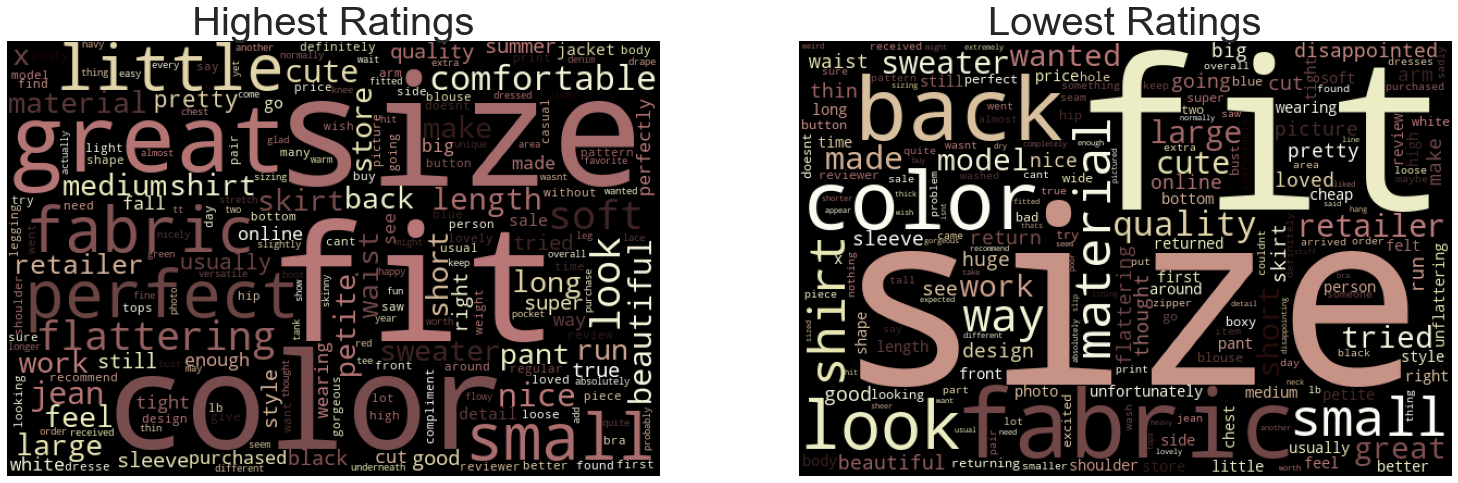

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloud1 = WordCloud(background_color='black',
                        width=600,
                        height=400, colormap='pink_r', collocations=False).generate(" ".join(high_ratings["clean_reviews1"]))

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Highest Ratings',fontsize=40)

wordcloud2 = WordCloud(background_color='black',
                        width=600,
                        height=400, colormap='pink_r', collocations=False).generate(" ".join(low_ratings["clean_reviews1"]))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Lowest Ratings',fontsize=40);

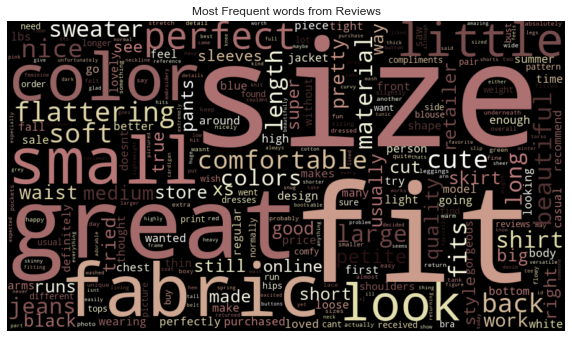

In [140]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=900, height=500, max_words=300, relative_scaling=0.5,
                          normalize_plurals=False, background_color="black", colormap='pink_r', collocations=False).generate(" ".join(data["clean_reviews1"]))
plt.title("Most Frequent words from Reviews")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [177]:
data

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
8       24  I love this dress. i usually get an xs but it ...       5   
9       34  I'm 5"5' and 125 lbs. i ordered the s petite t...       5   
16      34  Material and color is nice.  the leg opening i...       3   
...    ...                                                ...     ...   
23476   27  These bottoms are very cute but defiantly chee...       4   
23478   32  I was surprised at the positive reviews for th...       1   
23481   34  I was very happy to snag this dress at such a ...       5   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Initmates   Intimate   
1                1                        4         General    Dresses   
8                1                        0         General    Dresses   
9                1                        0         General    Dresses   
16               1                        2         General    Bottoms   
...            ...                      ...             ...        ...   
23476            1                        0       Initmates   Intimate   
23478            0                        0  General Petite    Dresses   
23481            1                        0  General Petite    Dresses   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   

           Class  
0      Intimates  
1        Dresses  
8        Dresses  
9        Dresses  
16         Pants  
...          ...  
23476       Swim  
23478    Dresses  
23481    Dresses  
23483    Dresses  
23484    Dresses  

[6676 rows x 8 columns]

In [178]:
young = data.loc[(data['Age'] >= 18) & (data['Age'] <= 35)]

In [179]:
adult = data.loc[(data['Age'] > 35) & (data['Age'] <= 50)]

In [180]:
senior = data.loc[(data['Age'] > 50) & (data['Age'] <= 99)]

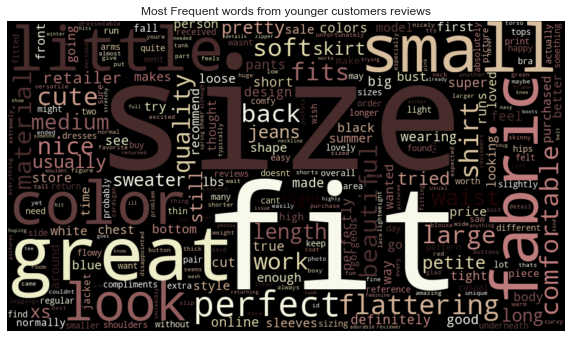

In [182]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=900, height=500, max_words=300, relative_scaling=0.5,
                          normalize_plurals=False, background_color="black", colormap='pink_r', collocations=False).generate(" ".join(young["clean_reviews1"]))
plt.title("Most Frequent words from younger customers reviews")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

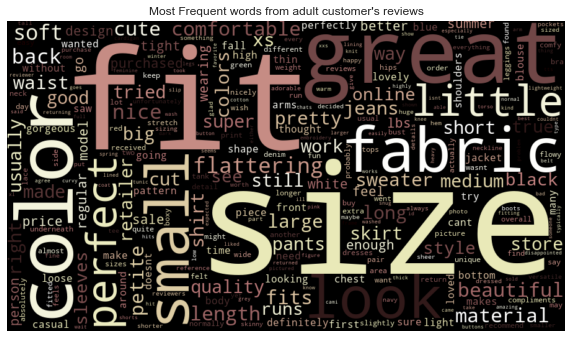

In [184]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=900, height=500, max_words=300, relative_scaling=0.5,
                          normalize_plurals=False, background_color="black", colormap='pink_r', collocations=False).generate(" ".join(adult["clean_reviews1"]))
plt.title("Most Frequent words from adult customer's reviews")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

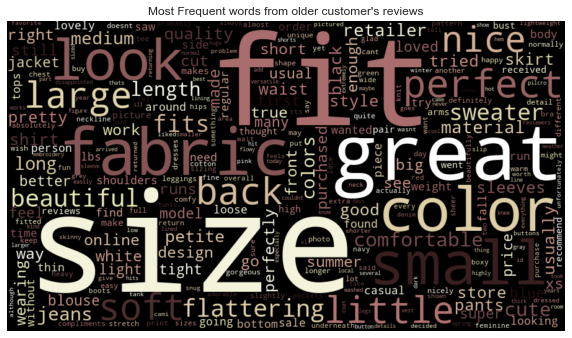

In [185]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=900, height=500, max_words=300, relative_scaling=0.5,
                          normalize_plurals=False, background_color="black", colormap='pink_r', collocations=False).generate(" ".join(senior["clean_reviews1"]))
plt.title("Most Frequent words from older customer's reviews")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [141]:
# Size (tight, small, short, large, length, loose, little...) - could be good to show the measures of the items online, or offer a tool
# Fabric, material - people really appreciate good quality of the fabrics, material.
# Price
# Color - offer good pictures with good light to show the color better.



## c. BIVARIATE ANALYSIS

### Ratings and Recommended comments

In [142]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [143]:
rating = data['Rating'].value_counts()
# 2 subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

recommended = data['Recommended'].value_counts()
recommended = data['Recommended'].value_counts().sort_values(ascending=False)

# 1. Rating
fig.add_trace(go.Pie(values=rating.values,
             labels=rating.index, 
             marker=dict(colors=['#515f78','#955914','#be9581','#e5f0f3','#27303a']),
             title= 'Rating',titlefont=dict(size=17)),row=1,col=1)

# 2. Recommended
fig.add_trace(go.Pie(values=recommended.values, 
             labels=recommended.index, 
             marker=dict(colors=['#515f78','#e5f0f3']),
             title= 'Recommended or not',titlefont=dict(size=17)),row=1,col=2)

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='black', width=0.2)))
fig.update_layout(
    font=dict(size=16,family="Franklin Gothic"))

In [144]:
#1.Rating: Here, we can notice that 4 and 5 rates account about 77% of the ratings.

#2.Recommended: About 82% products are recommended in this dataset.

### Department and Division

In [145]:
data

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Intimates   Intimate   
1                1                        4         General    Dresses   
2                0                        0         General    Dresses   
3                1                        0  General Petite    Bottoms   
4                1                        6         General       Tops   
...            ...                      ...             ...        ...   
23481            1                        0  General Petite    Dresses   
23482            1                        0  General Petite       Tops   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   
23485            1                       22  General Petite    Dresses   

           Class                                      clean_reviews  \
0      Intimates        absolutely wonderful silky sexy comfortable   
1        Dresses  love dress sooo pretty happened find store im ...   
2        Dresses  high hopes dress really wanted work initially ...   
3          Pants  love love love jumpsuit fun flirty fabulous ev...   
4        Blouses  shirt flattering due adjustable front tie perf...   
...          ...                                                ...   
23481    Dresses  happy snag dress great price easy slip flatter...   
23482      Knits  reminds maternity clothes soft stretchy shiny ...   
23483    Dresses  fit well top see never would worked im glad ab...   
23484    Dresses  bought dress wedding summer cute unfortunately...   
23485    Dresses  dress lovely platinum feminine fits perfectly ...   

                                          clean_reviews1  \
0            absolutely wonderful silky sexy comfortable   
1      sooo pretty happened find store glad bc never ...   
2      high hopes wanted work initially petite small ...   
3      jumpsuit fun flirty fabulous every time get no...   
4      shirt flattering due adjustable front tie perf...   
...                                                  ...   
23481  happy snag great price easy slip flattering cu...   
23482  reminds maternity clothes soft stretchy shiny ...   
23483  fit see never worked glad able try store order...   
23484  wedding summer cute unfortunately fit isnt per...   
23485  lovely platinum feminine fits perfectly easy c...   

                                          reviews_tokens  
0      [absolutely, wonderful, silky, sexy, comfortable]  
1      [sooo, pretty, happened, find, store, glad, bc...  
2      [high, hopes, wanted, work, initially, petite,...  
3      [jumpsuit, fun, flirty, fabulous, every, time,...  
4      [shirt, flattering, due, adjustable, front, ti...  
...                                                  ...  
23481  [happy, snag, great, price, easy, slip, flatte...  
23482  [reminds, maternity, clothes, soft, stretchy, ...  
23483  [fit, see, never, worked, glad, able, try, sto...  
23484  [wedding, summer, cute, unfortunately, fit, is...  
23485  [lovely, pl

In [146]:
df = data.groupby(['Division', 'Department']).count()['Review'].reset_index()

In [147]:
df

Division Department  Review
0          General    Bottoms    2447
1          General    Dresses    3619
2          General    Jackets     624
3          General       Tops    6580
4          General      Trend      95
5   General Petite    Bottoms    1215
6   General Petite    Dresses    2526
7   General Petite   Intimate     227
8   General Petite    Jackets     378
9   General Petite       Tops    3468
10  General Petite      Trend      23
11       Intimates   Intimate    1426

In [148]:
df.rename({'Review': 'Count'}, axis=1,inplace=True)
df

Division Department  Count
0          General    Bottoms   2447
1          General    Dresses   3619
2          General    Jackets    624
3          General       Tops   6580
4          General      Trend     95
5   General Petite    Bottoms   1215
6   General Petite    Dresses   2526
7   General Petite   Intimate    227
8   General Petite    Jackets    378
9   General Petite       Tops   3468
10  General Petite      Trend     23
11       Intimates   Intimate   1426

In [149]:
df = df[df["Division"].str.contains("General")]

In [150]:
df

Division Department  Count
0          General    Bottoms   2447
1          General    Dresses   3619
2          General    Jackets    624
3          General       Tops   6580
4          General      Trend     95
5   General Petite    Bottoms   1215
6   General Petite    Dresses   2526
7   General Petite   Intimate    227
8   General Petite    Jackets    378
9   General Petite       Tops   3468
10  General Petite      Trend     23

In [151]:
fig = px.bar(df, x= 'Department', y= 'Count', color= 'Division',
            color_discrete_sequence = ['#515f78','#955914', '#be9581', '#e5f0f3', '#27303a'])
fig.update_layout(barmode='group')
fig.show()

### Department and Rating

In [152]:
df1 = data.groupby(['Department', 'Rating']).count()['Review'].reset_index()

In [153]:
df1

Department  Rating  Review
0     Bottoms       1     114
1     Bottoms       2     203
2     Bottoms       3     407
3     Bottoms       4     762
4     Bottoms       5    2176
5     Dresses       1     222
6     Dresses       2     459
7     Dresses       3     830
8     Dresses       4    1367
9     Dresses       5    3267
10   Intimate       1      60
11   Intimate       2      87
12   Intimate       3     177
13   Intimate       4     350
14   Intimate       5     979
15    Jackets       1      48
16    Jackets       2      60
17    Jackets       3      90
18    Jackets       4     195
19    Jackets       5     609
20       Tops       1     367
21       Tops       2     729
22       Tops       3    1300
23       Tops       4    2208
24       Tops       5    5444
25      Trend       1      10
26      Trend       2      11
27      Trend       3      19
28      Trend       4      26
29      Trend       5      52

In [154]:
df1.rename({'Review': 'Count'}, axis=1,inplace=True)
df1

Department  Rating  Count
0     Bottoms       1    114
1     Bottoms       2    203
2     Bottoms       3    407
3     Bottoms       4    762
4     Bottoms       5   2176
5     Dresses       1    222
6     Dresses       2    459
7     Dresses       3    830
8     Dresses       4   1367
9     Dresses       5   3267
10   Intimate       1     60
11   Intimate       2     87
12   Intimate       3    177
13   Intimate       4    350
14   Intimate       5    979
15    Jackets       1     48
16    Jackets       2     60
17    Jackets       3     90
18    Jackets       4    195
19    Jackets       5    609
20       Tops       1    367
21       Tops       2    729
22       Tops       3   1300
23       Tops       4   2208
24       Tops       5   5444
25      Trend       1     10
26      Trend       2     11
27      Trend       3     19
28      Trend       4     26
29      Trend       5     52

In [155]:
'#515f78','#955914','#be9581','#e5f0f3','#27303a'

('#515f78', '#955914', '#be9581', '#e5f0f3', '#27303a')

In [156]:
fig = px.bar(df1, x= 'Department', y= 'Count', color= 'Rating',
             color_discrete_sequence = ['#515f78','#955914', 'be9581', '#e5f0f3', '#27303a', '#555555'])
fig.update_layout(barmode='group')
fig.show()

In [157]:
# Tops department seems to be the one with more ratings, mostly high.

# 5. Topic Modeling: LDA

## Latent Dirichlet Allocation (LDA)

In [158]:
from gensim import corpora

In [159]:
data

Age                                             Review  Rating  \
0       33  Absolutely wonderful - silky and sexy and comf...       4   
1       34  Love this dress!  it's sooo pretty.  i happene...       5   
2       60  I had such high hopes for this dress and reall...       3   
3       50  I love, love, love this jumpsuit. it's fun, fl...       5   
4       47  This shirt is very flattering to all due to th...       5   
...    ...                                                ...     ...   
23481   34  I was very happy to snag this dress at such a ...       5   
23482   48  It reminds me of maternity clothes. soft, stre...       3   
23483   31  This fit well, but the top was very see throug...       3   
23484   28  I bought this dress for a wedding i have this ...       3   
23485   52  This dress in a lovely platinum is feminine an...       5   

       Recommended  Positive Feedback Count        Division Department  \
0                1                        0       Intimates   Intimate   
1                1                        4         General    Dresses   
2                0                        0         General    Dresses   
3                1                        0  General Petite    Bottoms   
4                1                        6         General       Tops   
...            ...                      ...             ...        ...   
23481            1                        0  General Petite    Dresses   
23482            1                        0  General Petite       Tops   
23483            0                        1  General Petite    Dresses   
23484            1                        2         General    Dresses   
23485            1                       22  General Petite    Dresses   

           Class                                      clean_reviews  \
0      Intimates        absolutely wonderful silky sexy comfortable   
1        Dresses  love dress sooo pretty happened find store im ...   
2        Dresses  high hopes dress really wanted work initially ...   
3          Pants  love love love jumpsuit fun flirty fabulous ev...   
4        Blouses  shirt flattering due adjustable front tie perf...   
...          ...                                                ...   
23481    Dresses  happy snag dress great price easy slip flatter...   
23482      Knits  reminds maternity clothes soft stretchy shiny ...   
23483    Dresses  fit well top see never would worked im glad ab...   
23484    Dresses  bought dress wedding summer cute unfortunately...   
23485    Dresses  dress lovely platinum feminine fits perfectly ...   

                                          clean_reviews1  \
0            absolutely wonderful silky sexy comfortable   
1      sooo pretty happened find store glad bc never ...   
2      high hopes wanted work initially petite small ...   
3      jumpsuit fun flirty fabulous every time get no...   
4      shirt flattering due adjustable front tie perf...   
...                                                  ...   
23481  happy snag great price easy slip flattering cu...   
23482  reminds maternity clothes soft stretchy shiny ...   
23483  fit see never worked glad able try store order...   
23484  wedding summer cute unfortunately fit isnt per...   
23485  lovely platinum feminine fits perfectly easy c...   

                                          reviews_tokens  
0      [absolutely, wonderful, silky, sexy, comfortable]  
1      [sooo, pretty, happened, find, store, glad, bc...  
2      [high, hopes, wanted, work, initially, petite,...  
3      [jumpsuit, fun, flirty, fabulous, every, time,...  
4      [shirt, flattering, due, adjustable, front, ti...  
...                                                  ...  
23481  [happy, snag, great, price, easy, slip, flatte...  
23482  [reminds, maternity, clothes, soft, stretchy, ...  
23483  [fit, see, never, worked, glad, able, try, sto...  
23484  [wedding, summer, cute, unfortunately, fit, is...  
23485  [lovely, pl

In [160]:
dictionary = corpora.Dictionary(data['reviews_tokens'])

In [161]:
print(dictionary.token2id)

{'absolutely': 0, 'comfortable': 1, 'sexy': 2, 'silky': 3, 'wonderful': 4, 'bc': 5, 'definitely': 6, 'find': 7, 'glad': 8, 'happened': 9, 'hits': 10, 'knee': 11, 'length': 12, 'little': 13, 'midi': 14, 'never': 15, 'online': 16, 'petite': 17, 'pretty': 18, 'someone': 19, 'sooo': 20, 'store': 21, 'true': 22, 'truly': 23, 'bottom': 24, 'c': 25, 'cheap': 26, 'could': 27, 'design': 28, 'directly': 29, 'fact': 30, 'fit': 31, 'flaw': 32, 'found': 33, 'half': 34, 'high': 35, 'hopes': 36, 'imo': 37, 'initially': 38, 'layer': 39, 'layers': 40, 'major': 41, 'medium': 42, 'net': 43, 'nicely': 44, 'ok': 45, 'outrageously': 46, 'overall': 47, 'reordered': 48, 'several': 49, 'sewn': 50, 'size': 51, 'small': 52, 'somewhat': 53, 'tight': 54, 'usual': 55, 'wanted': 56, 'work': 57, 'zip': 58, 'zipper': 59, 'compliments': 60, 'every': 61, 'fabulous': 62, 'flirty': 63, 'fun': 64, 'get': 65, 'great': 66, 'jumpsuit': 67, 'nothing': 68, 'time': 69, 'adjustable': 70, 'cardigan': 71, 'due': 72, 'flattering': 7

In [162]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['reviews_tokens']]
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

In [163]:
doc_term_matrix[15]

[(18, 1),
 (19, 1),
 (27, 2),
 (31, 1),
 (52, 1),
 (54, 1),
 (56, 1),
 (84, 1),
 (96, 1),
 (132, 1),
 (155, 1),
 (177, 1),
 (181, 1),
 (217, 1),
 (275, 2),
 (276, 1),
 (277, 1),
 (278, 1),
 (279, 1),
 (280, 1),
 (281, 1),
 (282, 1),
 (283, 1),
 (284, 1),
 (285, 1),
 (286, 1),
 (287, 1),
 (288, 1),
 (289, 1),
 (290, 1),
 (291, 2),
 (292, 1),
 (293, 1),
 (294, 1)]

In [164]:
for word_id, count in doc_term_matrix[15]:
    print(word_id,dictionary[word_id])
    print('--------')

18 pretty
--------
19 someone
--------
27 could
--------
31 fit
--------
52 small
--------
54 tight
--------
56 wanted
--------
84 color
--------
96 package
--------
132 said
--------
155 nice
--------
177 fabric
--------
181 make
--------
217 made
--------
275 waist
--------
276 badly
--------
277 body
--------
278 figure
--------
279 happy
--------
280 hips
--------
281 hope
--------
282 hourglass
--------
283 linenlike
--------
284 put
--------
285 roomy
--------
286 shape
--------
287 sized
--------
288 still
--------
289 straight
--------
290 sturdy
--------
291 tell
--------
292 took
--------
293 way
--------
294 wouldnt
--------


In [165]:
#Create and fit the LDA model
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, 
               passes=20) #num of passes through the corpus during training.

# Extract word distributions for the optimized topics from LDA model

In [166]:
for i in ldamodel.print_topics():
    print('Topic number {} \n'.format(i[0]))
    for j in i: 
        print (j)
        print('......................')

Topic number 0 

0
......................
0.014*"store" + 0.011*"saw" + 0.010*"price" + 0.010*"first" + 0.009*"online" + 0.009*"retailer" + 0.009*"sale" + 0.008*"tried" + 0.007*"back" + 0.007*"get"
......................
Topic number 1 

1
......................
0.040*"size" + 0.025*"small" + 0.021*"fit" + 0.015*"large" + 0.012*"petite" + 0.011*"medium" + 0.010*"xs" + 0.010*"big" + 0.010*"usually" + 0.009*"little"
......................
Topic number 2 

2
......................
0.020*"color" + 0.018*"fabric" + 0.013*"look" + 0.011*"nice" + 0.011*"back" + 0.010*"skirt" + 0.009*"material" + 0.009*"sweater" + 0.009*"beautiful" + 0.008*"flattering"
......................
Topic number 3 

3
......................
0.029*"great" + 0.019*"perfect" + 0.017*"comfortable" + 0.015*"jeans" + 0.013*"soft" + 0.013*"fit" + 0.010*"color" + 0.010*"flattering" + 0.010*"size" + 0.009*"summer"
......................


In [167]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
second_topic_words = dict(ldamodel.show_topic(1,1000))
third_topic_words = dict(ldamodel.show_topic(2,1000))
fourth_topic_words = dict(ldamodel.show_topic(3,1000))
#fifth_topic_words = dict(ldamodel.show_topic(4,1000))
#sixth_topic_words = dict(ldamodel.show_topic(5,1000))

In [168]:
def visualize_wordcloud_dict_frequencies(dict_freqs, title, relative_scaling=0.5, max_words=100,
                                background_color='black'):
    plt.figure(figsize=(10, 10))
    wordcloud = WordCloud(width=900, height=500, max_words=max_words, relative_scaling=relative_scaling,
                          normalize_plurals=False, background_color=background_color).generate_from_frequencies(
        dict_freqs)
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

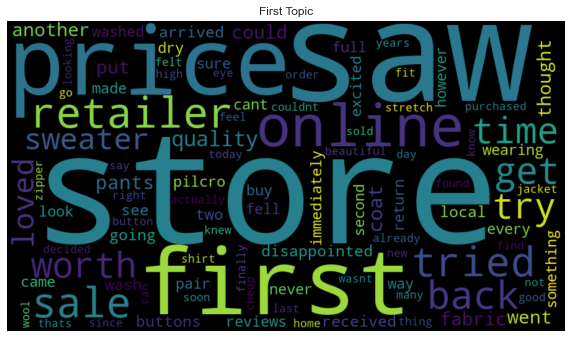

In [169]:
visualize_wordcloud_dict_frequencies(first_topic_words, "First Topic", relative_scaling=0.5, max_words=100,
                                background_color='black')

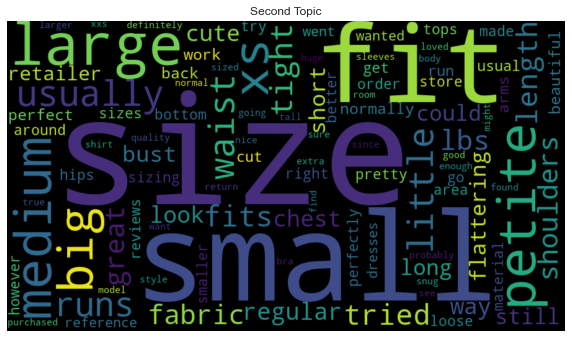

In [170]:
visualize_wordcloud_dict_frequencies(second_topic_words, "Second Topic", relative_scaling=0.5, max_words=100,
                                background_color='black')

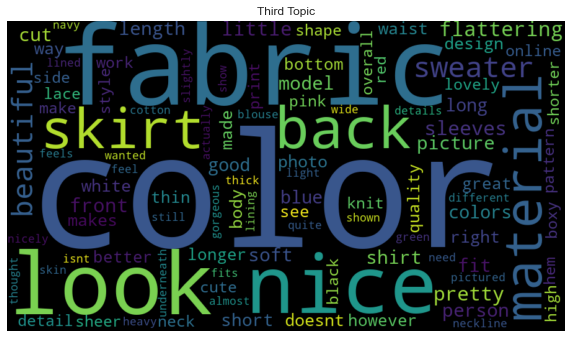

In [171]:
visualize_wordcloud_dict_frequencies(third_topic_words, "Third Topic", relative_scaling=0.5, max_words=100,
                                background_color='black')

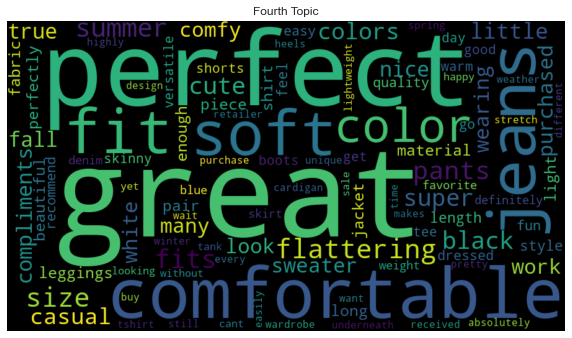

In [172]:
visualize_wordcloud_dict_frequencies(fourth_topic_words, "Fourth Topic", relative_scaling=0.5, max_words=100,
                                background_color='black')

In [173]:
#visualize_wordcloud_dict_frequencies(fifth_topic_words, "Fifth Topic", relative_scaling=0.5, max_words=100,
#                                background_color='black')

In [174]:
#visualize_wordcloud_dict_frequencies(sixth_topic_words, "Sixth Topic", relative_scaling=0.5, max_words=100,
#                                background_color='black')

In [175]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)

/Users/patri/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/patri/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/patri/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/patri/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/patri/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py

In [176]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.017896 -0.136824       1        1  32.567907
3     -0.107875  0.193997       2        1  25.828281
2     -0.126151 -0.086972       3        1  24.693337
0      0.251922  0.029799       4        1  16.910475, topic_info=        Term         Freq        Total Category  logprob  loglift
51      size  8559.000000  8559.000000  Default  30.0000  30.0000
52     small  4500.000000  4500.000000  Default  29.0000  29.0000
66     great  5762.000000  5762.000000  Default  28.0000  28.0000
302    large  2701.000000  2701.000000  Default  27.0000  27.0000
77   perfect  3548.000000  3548.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
650      two   319.683837   725.785253   Topic4  -5.6784   0.9573
200    going   346.546961  1133.632212   Topic4  -5.5978   0.5921
27     could   362.625683  1714.761771   Topic4  -5.5524   0.2236
177   fabric   387.318542  4627.061218   Topic4  -5.4865  -0.7032
133      see   328.874993  1515.508004   Topic4  -5.6501   0.2494

[291 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
563       1  0.997864   across
3434      4  0.995987       ag
1892      3  0.992015   ankles
816       1  0.302570  another
816       2  0.175728  another
...     ...       ...      ...
140       2  0.047887       xs
140       3  0.000509       xs
1760      1  0.989965   xsmall
168       1  0.997640      xxs
58        1  0.995539      zip

[470 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])